<a href="https://colab.research.google.com/github/YogitaPatel/Credit-Card-Approval/blob/main/Credit_Card_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Approval Prediction

#Initializing


In [ ]:
!apt-get update > /dev/null
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#!wget -q http://apache.osuosl.org/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!wget -q http://apache.osuosl.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
# If the current version of Spark is not used, there may be errors.
# Check here for current versions http://apache.osuosl.org/spark
#!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
#!pip install -q findspark
!pip install -q pyspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"

In [ ]:
#import findspark
#findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [ ]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Importing and downloading the Datasets from GoogleDrive

In [ ]:
!gdown 'https://drive.google.com/uc?id=1yWSB7RXFgmx_fvB1hAmH60eHV9B339qb'
!gdown 'https://drive.google.com/uc?id=1vBecmHCEnSudbo_hCfbm7qTDgaPT94WK'

Downloading...
From: https://drive.google.com/uc?id=1yWSB7RXFgmx_fvB1hAmH60eHV9B339qb
To: /content/application_record.csv
100% 54.3M/54.3M [00:01<00:00, 33.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vBecmHCEnSudbo_hCfbm7qTDgaPT94WK
To: /content/credit_record.csv
100% 15.4M/15.4M [00:00<00:00, 29.6MB/s]


In [298]:
#Creating RDD

RDD_application = sc.textFile('application_record.csv')

#Value counting
RDD_application.count()

438558

In [288]:
#Displaying first 5 instances
RDD_application.take(5)

['ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS',
 '5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,,2.0',
 '5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,,2.0',
 '5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0',
 '5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0']

In [289]:
RDD_credit = sc.textFile('credit_record.csv')


In [290]:
RDD_credit.take(10)

['ID,MONTHS_BALANCE,STATUS',
 '5001711,0,X',
 '5001711,-1,0',
 '5001711,-2,0',
 '5001711,-3,0',
 '5001712,0,C',
 '5001712,-1,C',
 '5001712,-2,C',
 '5001712,-3,C',
 '5001712,-4,C']

In [291]:
# Map the RDD to a DF
df_application = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load('application_record.csv')
df_credit = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load('credit_record.csv')
df_application.cache()
df_application.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_OWN_REALTY: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- DAYS_BIRTH: integer (nullable = true)
 |-- DAYS_EMPLOYED: integer (nullable = true)
 |-- FLAG_MOBIL: integer (nullable = true)
 |-- FLAG_WORK_PHONE: integer (nullable = true)
 |-- FLAG_PHONE: integer (nullable = true)
 |-- FLAG_EMAIL: integer (nullable = true)
 |-- OCCUPATION_TYPE: string (nullable = true)
 |-- CNT_FAM_MEMBERS: double (nullable = true)



In [293]:
df_credit.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- MONTHS_BALANCE: integer (nullable = true)
 |-- STATUS: string (nullable = true)



In [ ]:
df_application.show()

+-------+-----------+------------+---------------+------------+----------------+--------------------+--------------------+--------------------+-----------------+----------+-------------+----------+---------------+----------+----------+---------------+---------------+
|     ID|CODE_GENDER|FLAG_OWN_CAR|FLAG_OWN_REALTY|CNT_CHILDREN|AMT_INCOME_TOTAL|    NAME_INCOME_TYPE| NAME_EDUCATION_TYPE|  NAME_FAMILY_STATUS|NAME_HOUSING_TYPE|DAYS_BIRTH|DAYS_EMPLOYED|FLAG_MOBIL|FLAG_WORK_PHONE|FLAG_PHONE|FLAG_EMAIL|OCCUPATION_TYPE|CNT_FAM_MEMBERS|
+-------+-----------+------------+---------------+------------+----------------+--------------------+--------------------+--------------------+-----------------+----------+-------------+----------+---------------+----------+----------+---------------+---------------+
|5008804|          M|           Y|              Y|           0|        427500.0|             Working|    Higher education|      Civil marriage| Rented apartment|    -12005|        -4542|         1

In [ ]:
pd.DataFrame(df_application.take(5), columns=df_application.columns).transpose()

,0,1,2,3,4
ID,5008804,5008805,5008806,5008808,5008809
CODE_GENDER,M,M,M,F,F
FLAG_OWN_CAR,Y,Y,Y,N,N
FLAG_OWN_REALTY,Y,Y,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,427500.0,427500.0,112500.0,270000.0,270000.0
NAME_INCOME_TYPE,Working,Working,Working,Commercial associate,Commercial associate
NAME_EDUCATION_TYPE,Higher education,Higher education,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special
NAME_FAMILY_STATUS,Civil marriage,Civil marriage,Married,Single / not married,Single / not married
NAME_HOUSING_TYPE,Rented apartment,Rented apartment,House / apartment,House / apartment,House / apartment


In [ ]:
df_application.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
ID,438557,6022176.269841776,571637.0232571006,5008804,7999952
CODE_GENDER,438557,None,None,F,M
FLAG_OWN_CAR,438557,None,None,N,Y
FLAG_OWN_REALTY,438557,None,None,N,Y
CNT_CHILDREN,438557,0.42739028222101116,0.724882213552146,0,19
AMT_INCOME_TOTAL,438557,187524.2860095039,110086.85306622987,26100.0,6750000.0
NAME_INCOME_TYPE,438557,None,None,Commercial associate,Working
NAME_EDUCATION_TYPE,438557,None,None,Academic degree,Secondary / secondary special
NAME_FAMILY_STATUS,438557,None,None,Civil marriage,Widow


# Preprocessing

In [ ]:
# Dropping Null value rows

df_application = df_application.na.drop()

In [ ]:
df_application.show()

+-------+-----------+------------+---------------+------------+----------------+--------------------+--------------------+--------------------+-----------------+----------+-------------+----------+---------------+----------+----------+---------------+---------------+
|     ID|CODE_GENDER|FLAG_OWN_CAR|FLAG_OWN_REALTY|CNT_CHILDREN|AMT_INCOME_TOTAL|    NAME_INCOME_TYPE| NAME_EDUCATION_TYPE|  NAME_FAMILY_STATUS|NAME_HOUSING_TYPE|DAYS_BIRTH|DAYS_EMPLOYED|FLAG_MOBIL|FLAG_WORK_PHONE|FLAG_PHONE|FLAG_EMAIL|OCCUPATION_TYPE|CNT_FAM_MEMBERS|
+-------+-----------+------------+---------------+------------+----------------+--------------------+--------------------+--------------------+-----------------+----------+-------------+----------+---------------+----------+----------+---------------+---------------+
|5008806|          M|           Y|              Y|           0|        112500.0|             Working|Secondary / secon...|             Married|House / apartment|    -21474|        -1134|         1

In [ ]:
# Total datapoints left after removing null

df_application.count()

304354

Merging both datasets using id

In [ ]:
app_df = df_application.sort('ID')
credit_df = df_credit.sort('ID')

In [ ]:
app_df.show()

+-------+-----------+------------+---------------+------------+----------------+--------------------+--------------------+--------------------+-----------------+----------+-------------+----------+---------------+----------+----------+---------------+---------------+
|     ID|CODE_GENDER|FLAG_OWN_CAR|FLAG_OWN_REALTY|CNT_CHILDREN|AMT_INCOME_TOTAL|    NAME_INCOME_TYPE| NAME_EDUCATION_TYPE|  NAME_FAMILY_STATUS|NAME_HOUSING_TYPE|DAYS_BIRTH|DAYS_EMPLOYED|FLAG_MOBIL|FLAG_WORK_PHONE|FLAG_PHONE|FLAG_EMAIL|OCCUPATION_TYPE|CNT_FAM_MEMBERS|
+-------+-----------+------------+---------------+------------+----------------+--------------------+--------------------+--------------------+-----------------+----------+-------------+----------+---------------+----------+----------+---------------+---------------+
|5008806|          M|           Y|              Y|           0|        112500.0|             Working|Secondary / secon...|             Married|House / apartment|    -21474|        -1134|         1

In [ ]:
credit_df.show()

+-------+--------------+------+
|     ID|MONTHS_BALANCE|STATUS|
+-------+--------------+------+
|5001711|            -2|     0|
|5001711|            -3|     0|
|5001711|             0|     X|
|5001711|            -1|     0|
|5001712|           -15|     0|
|5001712|           -11|     0|
|5001712|           -14|     0|
|5001712|            -5|     C|
|5001712|           -12|     0|
|5001712|            -6|     C|
|5001712|           -10|     0|
|5001712|            -3|     C|
|5001712|            -2|     C|
|5001712|           -13|     0|
|5001712|            -4|     C|
|5001712|            -8|     C|
|5001712|            -9|     0|
|5001712|             0|     C|
|5001712|            -7|     C|
|5001712|            -1|     C|
+-------+--------------+------+
only showing top 20 rows



In [ ]:
credit_df.select('STATUS').distinct().collect()


[Row(STATUS='3'),
 Row(STATUS='0'),
 Row(STATUS='5'),
 Row(STATUS='C'),
 Row(STATUS='X'),
 Row(STATUS='1'),
 Row(STATUS='4'),
 Row(STATUS='2')]

In [ ]:
from pyspark.sql.functions import lit
from pyspark.sql.functions import when
import pyspark.sql.functions as f

In [ ]:
#'C' : 'Good', 'X' : 'Good','0' : 'Bad', '1' : 'Bad', '2' : 'Bad','3' : 'Bad','4' : 'Bad','5' : 'Bad'

In [ ]:
# Creating new column from Status column

df_credit = df_credit.withColumn("STATUS_BINARY", when((df_credit.STATUS == 'C'), lit(1)) \
     .when((df_credit.STATUS == 'X'), lit(1)) \
     .otherwise(lit(0)))

In [ ]:
df_credit.show()

+-------+--------------+------+-------------+
|     ID|MONTHS_BALANCE|STATUS|STATUS_BINARY|
+-------+--------------+------+-------------+
|5001711|             0|     X|            1|
|5001711|            -1|     0|            0|
|5001711|            -2|     0|            0|
|5001711|            -3|     0|            0|
|5001712|             0|     C|            1|
|5001712|            -1|     C|            1|
|5001712|            -2|     C|            1|
|5001712|            -3|     C|            1|
|5001712|            -4|     C|            1|
|5001712|            -5|     C|            1|
|5001712|            -6|     C|            1|
|5001712|            -7|     C|            1|
|5001712|            -8|     C|            1|
|5001712|            -9|     0|            0|
|5001712|           -10|     0|            0|
|5001712|           -11|     0|            0|
|5001712|           -12|     0|            0|
|5001712|           -13|     0|            0|
|5001712|           -14|     0|   

In [ ]:
df_credit = df_credit.select('ID','STATUS_BINARY')

In [ ]:
#Aggregating Groupby id and total count of Binary status

df_new_credit = df_credit.select("ID","STATUS_BINARY").groupBy("ID")\
.agg(f.count("STATUS_BINARY").alias("count_total"),f.sum("STATUS_BINARY").alias("Status_Good")).sort("ID")

In [ ]:
df_new_credit.show()

+-------+-----------+-----------+
|     ID|count_total|Status_Good|
+-------+-----------+-----------+
|5001711|          4|          1|
|5001712|         19|          9|
|5001713|         22|         22|
|5001714|         15|         15|
|5001715|         60|         60|
|5001717|         22|          5|
|5001718|         39|         13|
|5001719|         43|         41|
|5001720|         36|          0|
|5001723|         31|         23|
|5001724|         31|         31|
|5001725|          8|          1|
|5001726|         39|         33|
|5001728|          1|          0|
|5001729|          7|          1|
|5001730|         61|         56|
|5001731|         11|         11|
|5001732|         36|         36|
|5001733|         11|         11|
|5001734|          3|          0|
+-------+-----------+-----------+
only showing top 20 rows



In [ ]:
# defining the rate of good debts for each user

df_new_credit = df_new_credit.withColumn("Status_Bad",(df_new_credit.count_total - df_new_credit.Status_Good))
df_new_credit = df_new_credit.withColumn("Rate", ((df_new_credit.Status_Good + 0.1)/(df_new_credit.Status_Bad + 0.1)))
#df_new_credit.show()

In [ ]:
df_new_credit = df_new_credit\
.withColumn("Credit_Score",f.round(df_new_credit.Status_Good/df_new_credit.count_total))
df_new_credit.show()

+-------+-----------+-----------+----------+--------------------+------------+
|     ID|count_total|Status_Good|Status_Bad|                Rate|Credit_Score|
+-------+-----------+-----------+----------+--------------------+------------+
|5001711|          4|          1|         3|  0.3548387096774194|         0.0|
|5001712|         19|          9|        10|   0.900990099009901|         0.0|
|5001713|         22|         22|         0|               221.0|         1.0|
|5001714|         15|         15|         0|               151.0|         1.0|
|5001715|         60|         60|         0|               601.0|         1.0|
|5001717|         22|          5|        17| 0.29824561403508765|         0.0|
|5001718|         39|         13|        26|  0.5019157088122604|         0.0|
|5001719|         43|         41|         2|  19.571428571428573|         1.0|
|5001720|         36|          0|        36|0.002770083102493075|         0.0|
|5001723|         31|         23|         8|   2.851

In [ ]:
df_new_credit = df_new_credit.select("ID","Rate","Credit_Score")

In [ ]:
df_new_credit.show()

+-------+--------------------+------------+
|     ID|                Rate|Credit_Score|
+-------+--------------------+------------+
|5001711|  0.3548387096774194|         0.0|
|5001712|   0.900990099009901|         0.0|
|5001713|               221.0|         1.0|
|5001714|               151.0|         1.0|
|5001715|               601.0|         1.0|
|5001717| 0.29824561403508765|         0.0|
|5001718|  0.5019157088122604|         0.0|
|5001719|  19.571428571428573|         1.0|
|5001720|0.002770083102493075|         0.0|
|5001723|   2.851851851851852|         1.0|
|5001724|               311.0|         1.0|
|5001725| 0.15492957746478875|         0.0|
|5001726|   5.426229508196722|         1.0|
|5001728| 0.09090909090909091|         0.0|
|5001729| 0.18032786885245905|         0.0|
|5001730|  11.000000000000002|         1.0|
|5001731|  110.99999999999999|         1.0|
|5001732|               361.0|         1.0|
|5001733|  110.99999999999999|         1.0|
|5001734| 0.03225806451612903|  

In [ ]:
df_final = df_application.join(df_new_credit, "id")

#Renaming columns
columns = ['ID', 'Gender', 'Car', 'Realty', 'Children', 'Income', 'Income_Type','Education_Type', 'Family_Status', 'Housing_Type',  'Age'\
           , 'Years_Experience', 'Mobile_Phone', 'Work_Phone','Phone', 'Email', 'Job_Title', 'Total_Family' , 'Rate','Status']
df_final = df_final.toDF(*columns)

In [ ]:
df_final.show()

+-------+------+---+------+--------+--------+--------------------+--------------------+--------------------+-----------------+------+----------------+------------+----------+-----+-----+--------------------+------------+--------------------+------+
|     ID|Gender|Car|Realty|Children|  Income|         Income_Type|      Education_Type|       Family_Status|     Housing_Type|   Age|Years_Experience|Mobile_Phone|Work_Phone|Phone|Email|           Job_Title|Total_Family|                Rate|Status|
+-------+------+---+------+--------+--------+--------------------+--------------------+--------------------+-----------------+------+----------------+------------+----------+-----+-----+--------------------+------------+--------------------+------+
|5009355|     F|  N|     N|       0|135000.0|Commercial associate|Secondary / secon...|             Married|House / apartment|-19692|           -5273|           1|         1|    1|    0|            Laborers|         2.0|0.043824701195219126|   0.0|
|500

In [ ]:
#Changing Age and Experience from negative days to years

df_final=df_final.withColumn("Age",df_final.Age/(-365))
df_final=df_final.withColumn("Years_Experience",df_final.Years_Experience/(-365))
df_final.show()

+-------+------+---+------+--------+--------+--------------------+--------------------+--------------------+-----------------+------------------+------------------+------------+----------+-----+-----+--------------------+------------+--------------------+------+
|     ID|Gender|Car|Realty|Children|  Income|         Income_Type|      Education_Type|       Family_Status|     Housing_Type|               Age|  Years_Experience|Mobile_Phone|Work_Phone|Phone|Email|           Job_Title|Total_Family|                Rate|Status|
+-------+------+---+------+--------+--------+--------------------+--------------------+--------------------+-----------------+------------------+------------------+------------+----------+-----+-----+--------------------+------------+--------------------+------+
|5009355|     F|  N|     N|       0|135000.0|Commercial associate|Secondary / secon...|             Married|House / apartment| 53.95068493150685|14.446575342465753|           1|         1|    1|    0|           

# EDA


In [ ]:
Pdf_final=df_final.toPandas()

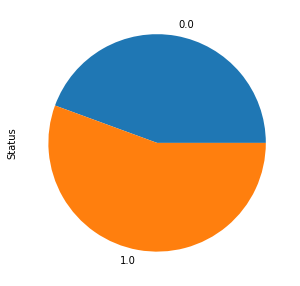

In [ ]:
Pdf_final.groupby('Status')['Status'].count().plot(kind='pie', y='Status',figsize=(5, 5) )

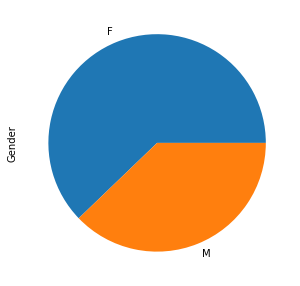

In [ ]:
Pdf_final.groupby('Gender')['Gender'].count().plot(kind='pie', y='Gender', figsize=(5, 5))

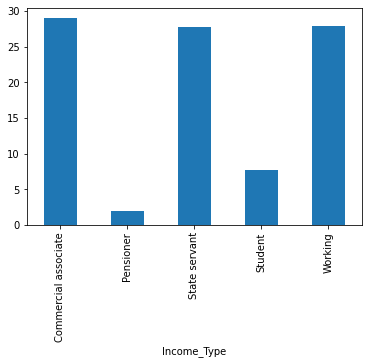

In [ ]:
Pdf_final.groupby('Income_Type')['Rate'].mean().plot(kind = 'bar')

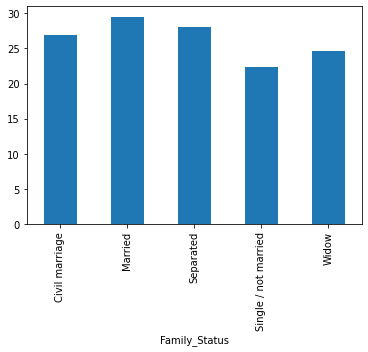

In [ ]:
Pdf_final.groupby('Family_Status')['Rate'].mean().plot(kind = 'bar')

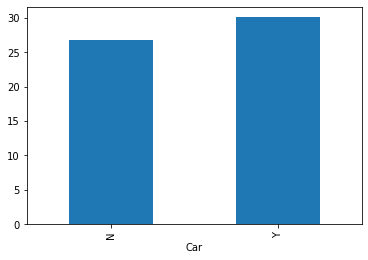

In [ ]:
Pdf_final.groupby('Car')['Rate'].mean().plot(kind = 'bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcde415b490>]],
      dtype=object)

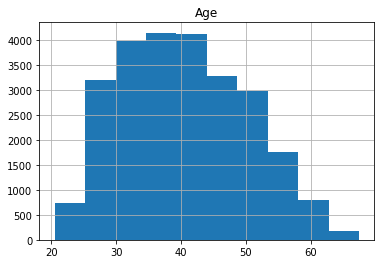

In [ ]:
Pdf_final.hist(column='Age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcde44ee450>]],
      dtype=object)

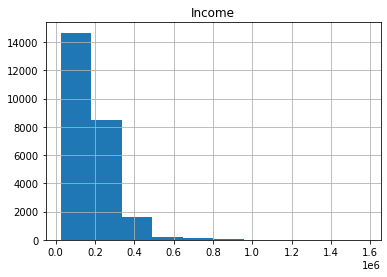

In [ ]:
Pdf_final.hist(column='Income')

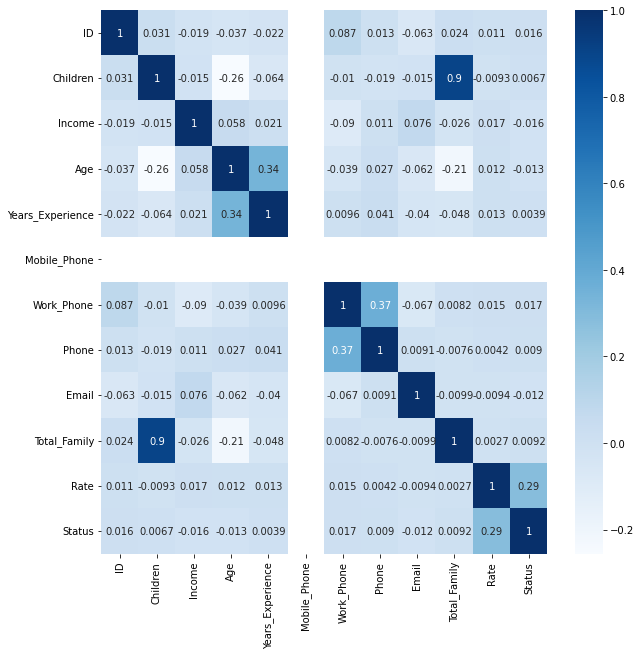

In [ ]:
corr = Pdf_final.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, cmap="Blues", annot=True)

Based on Corr Heatmap

We will remove children (beacase high correlation with total_family)

We will remove Mobile_phone

In [ ]:
Pdf_final.drop(['Children','Mobile_Phone'],axis=1,inplace=True)

#Also droping from the pyspark dataframe
df_final.drop("Children", "Mobile_Phone")

DataFrame[ID: int, Gender: string, Car: string, Realty: string, Income: double, Income_Type: string, Education_Type: string, Family_Status: string, Housing_Type: string, Age: double, Years_Experience: double, Work_Phone: int, Phone: int, Email: int, Job_Title: string, Total_Family: double, Rate: double, Status: double]

In [ ]:
Pdf_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                25134 non-null  int32  
 1   Gender            25134 non-null  object 
 2   Car               25134 non-null  object 
 3   Realty            25134 non-null  object 
 4   Income            25134 non-null  float64
 5   Income_Type       25134 non-null  object 
 6   Education_Type    25134 non-null  object 
 7   Family_Status     25134 non-null  object 
 8   Housing_Type      25134 non-null  object 
 9   Age               25134 non-null  float64
 10  Years_Experience  25134 non-null  float64
 11  Work_Phone        25134 non-null  int32  
 12  Phone             25134 non-null  int32  
 13  Email             25134 non-null  int32  
 14  Job_Title         25134 non-null  object 
 15  Total_Family      25134 non-null  float64
 16  Rate              25134 non-null  float6

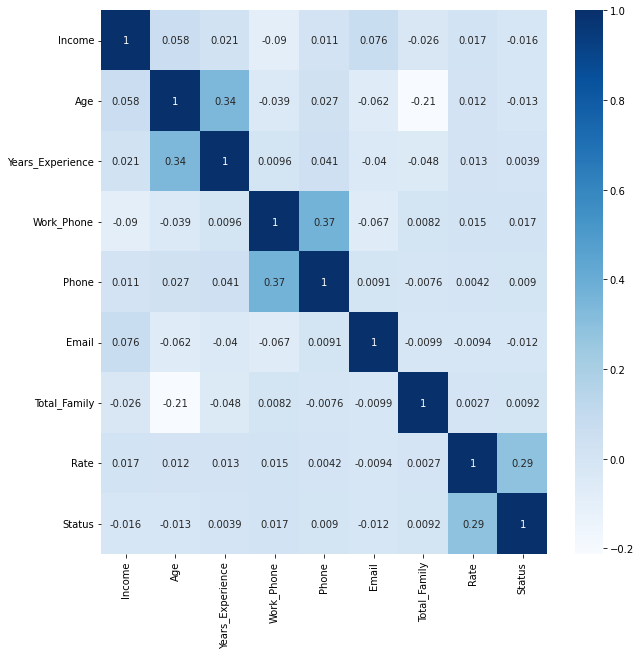

In [ ]:
corr = Pdf_final.drop('ID',axis=1).corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, cmap="Blues", annot=True)

# Modelling

In [ ]:
from pyspark.ml.feature import OneHotEncoder,StringIndexer, VectorAssembler

In [ ]:
# Handling categorical columns and encoding them
cols = df_final.columns
Cat_features = ['Realty', 'Gender','Car','Income_Type','Education_Type','Family_Status','Housing_Type','Job_Title']
stages = []

for col in Cat_features:
  stringIndexer = StringIndexer(inputCol = col, outputCol = col + 'Index')
  encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[col + "classVec"])
  stages += [stringIndexer, encoder]


In [ ]:
label_stringIdx = StringIndexer(inputCol = 'Status', outputCol = 'label')
stages += [label_stringIdx]

In [ ]:
numericCols = ['Income', 'Age', 'Years_Experience', 'Work_Phone', 'Phone', 'Email','Total_Family','Rate']
assemblerInputs = [c + "classVec" for c in Cat_features] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [ ]:
#creating pipeline

from pyspark.ml import Pipeline

pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df_final)
df_final = pipelineModel.transform(df_final)
#selectedCols = ['label', 'features'] + cols
#df_final = df_final.select(selectedCols)
df_final.show()

+-------+------+---+------+--------+--------+--------------------+--------------------+--------------------+-----------------+------------------+------------------+------------+----------+-----+-----+--------------------+------------+--------------------+------+-----------+--------------+-----------+--------------+--------+-------------+----------------+-------------------+-------------------+----------------------+------------------+---------------------+-----------------+--------------------+--------------+-----------------+-----+--------------------+
|     ID|Gender|Car|Realty|Children|  Income|         Income_Type|      Education_Type|       Family_Status|     Housing_Type|               Age|  Years_Experience|Mobile_Phone|Work_Phone|Phone|Email|           Job_Title|Total_Family|                Rate|Status|RealtyIndex|RealtyclassVec|GenderIndex|GenderclassVec|CarIndex|  CarclassVec|Income_TypeIndex|Income_TypeclassVec|Education_TypeIndex|Education_TypeclassVec|Family_StatusIndex|Fa

In [ ]:
train, test = df_final.randomSplit([0.8, 0.2], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 20024
Test Dataset Count: 5110


In [ ]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)

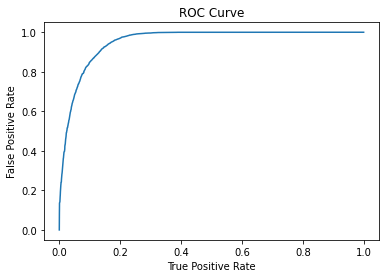

Training set areaUnderROC: 0.952753640610668


In [297]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
predictions = lrModel.transform(test)
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.9542678621202267


In [296]:
predictions_train = lrModel.transform(train)

y_true = predictions_train.select(['label']).collect()
y_pred = predictions_train.select(['prediction']).collect()

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.77      0.86     11152
         1.0       0.77      0.99      0.87      8872

    accuracy                           0.86     20024
   macro avg       0.88      0.88      0.86     20024
weighted avg       0.89      0.86      0.86     20024

